<a href="https://colab.research.google.com/github/Harrisson3/Breast-Cancer-Dataset/blob/main/hamlet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Labels


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


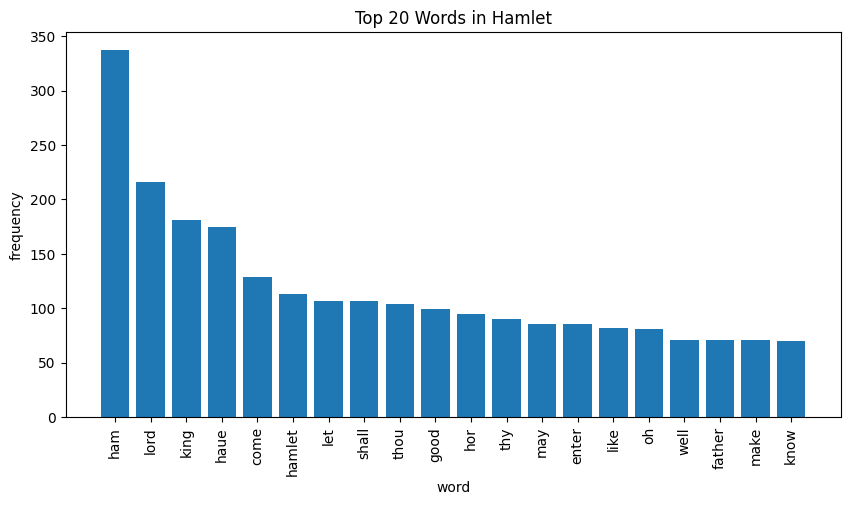

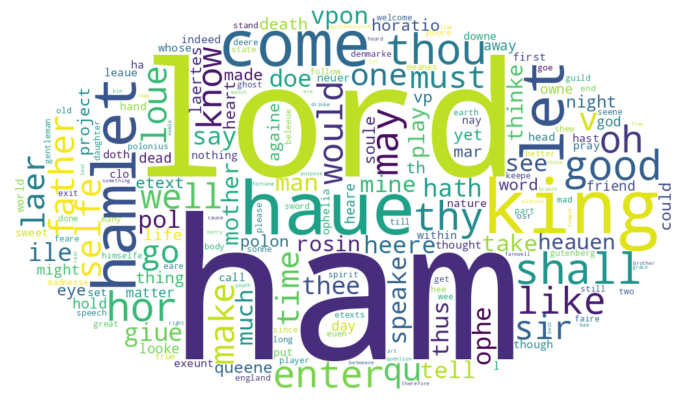

In [3]:
import nltk
import requests
import imageio
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab', force=True)

# Downloading Hamlet text
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Tokenize words
tokens = word_tokenize(data.lower())

# Removing stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]

# Performing lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Getting word frequency
word_counts = Counter(lemmatized_words)
common_words = word_counts.most_common(20)

# Plotting bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel("word")
plt.ylabel("frequency")
plt.title("Top 20 Words in Hamlet")
plt.show()

# Loading mask image
mask_url = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.v3.imread(mask_url)

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask_image).generate_from_frequencies(word_counts)

# Displaying word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
